In [6]:

using Flux, DiffEqFlux, DifferentialEquations


2×30 Matrix{Float32}:
 2.0  1.9465    1.74178  1.23837  0.577125  …  1.40688   1.37022   1.29214
 0.0  0.798831  1.46473  1.80877  1.86465      0.451368  0.728686  0.972085

In [21]:
#example of LV equarion

# first define LV equation:

function lotka_volterra(du,u,p,t)
  x, y = u
  α, β, δ, γ = p
  du[1] = dx = α*x - β*x*y
  du[2] = dy = -δ*y + γ*x*y
end
u0 = [1.0,1.0]
tspan = (0.0,10.0)
p = [1.5,1.0,3.0,1.0]
#define exact lv equation
prob = ODEProblem(lotka_volterra,u0,tspan,p)



ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 1.0
 1.0

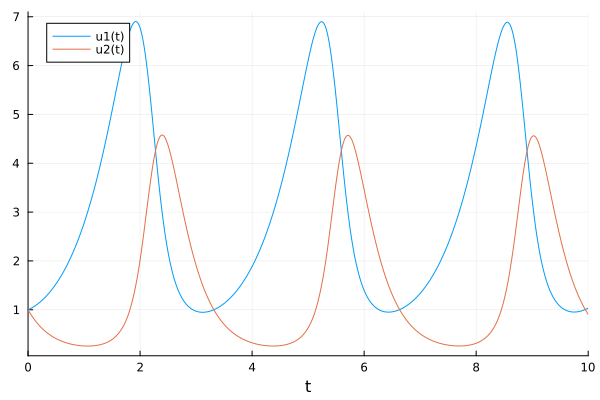

In [10]:
# use sole function to solve the equations and have result data for further traning
sol = solve(prob)
using Plots
plot(sol)
#here is the plot of solver


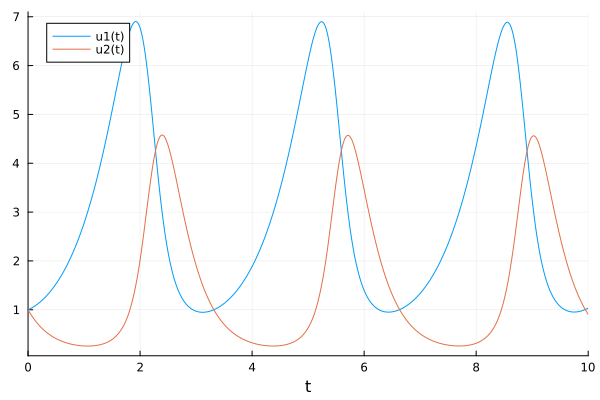

In [14]:
# this part not understand???
# using initial condition (u0) and time spans (tspans) to be functions of the parameters (the elements of p).
# For example, we can define the ODEProblem:

u0_f(p,t0) = [p[2],p[4]]
tspan_f(p) = (0.0,10*p[4]) #why not just take the right bound as 10.0?
p = [1.5,1.0,3.0,1.0]
prob2 = ODEProblem(lotka_volterra,u0_f,tspan_f,p)
sol2 = solve(prob2)
plot(sol2)
# In this form, the equation is determined by the parameter vector (p, referred to as θ in associated literature). 


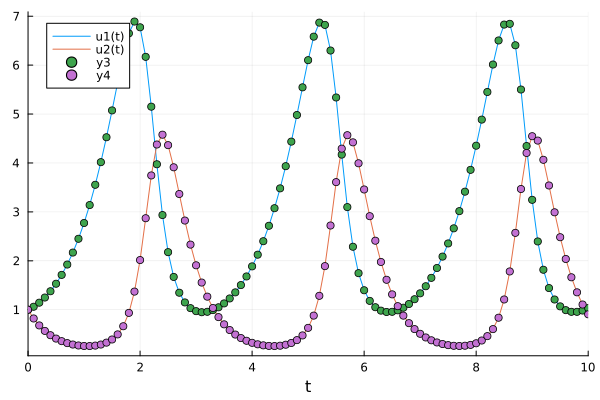

In [26]:
#define equation syst4me
p = [1.5,1.0,3.0,1.0]
prob3 = ODEProblem(lotka_volterra,u0,tspan,p)
sol = solve(prob3,Tsit5(),saveat=0.1)
A = sol[1,:] # length 101 vector
A2 = sol[2,:]
plot(sol)
t = 0:0.1:10.0
scatter!(t,A)
scatter!(t,A2)
#the point is what we got in the solving process(t_i,u_1(t_i)), and (t_i,u_2(t_i))

In [27]:
# define neural networK:
using Flux, DiffEqFlux

p = [2.2, 1.0, 2.0, 0.4] # Initial Parameter Vector
params = Flux.params(p) #Given a model or specific layers from a model, create a Params object pointing to its trainable parameters.

function predict_rd() # 1-layer "neural network"
  solve(prob,Tsit5(),p=p,saveat=0.1)[1,:] # override with new parameters
end

loss_rd() = sum(abs2,x-1 for x in predict_rd()) # loss function

loss_rd (generic function with 1 method)

0.00023039104211612348

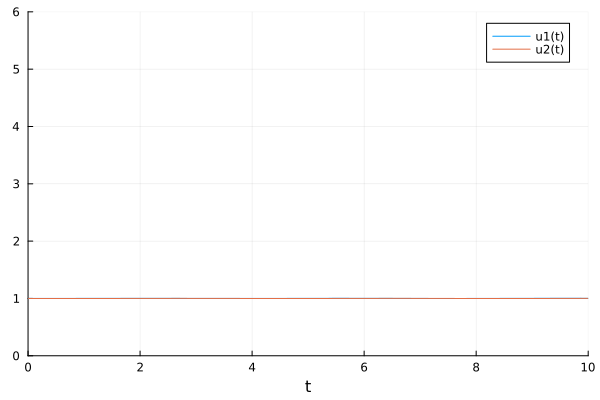

3.30581787481116

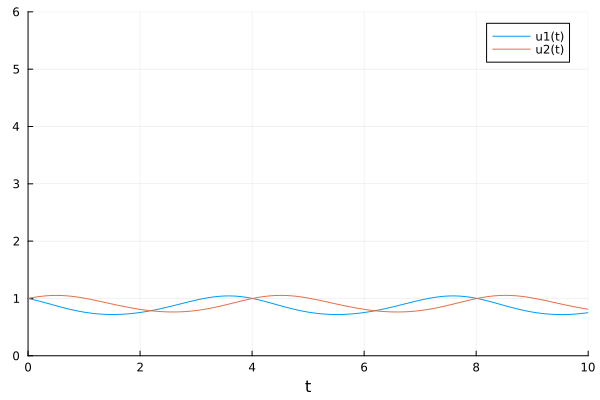

0.25265173406483804

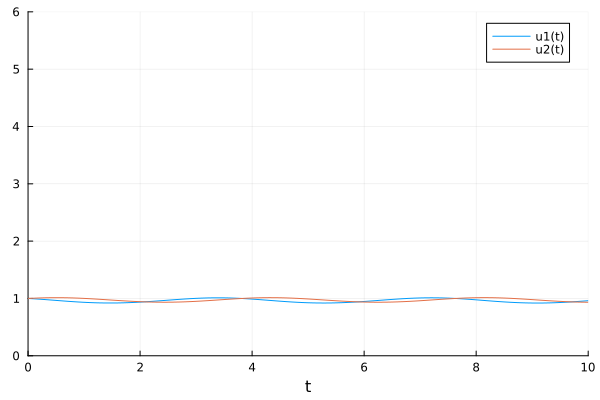

1.0043243465653977

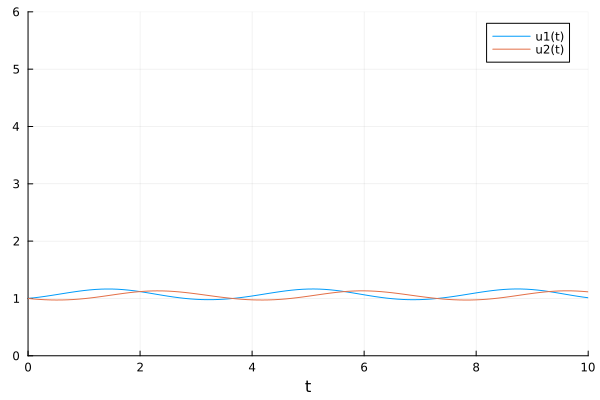

1.8486657599082748

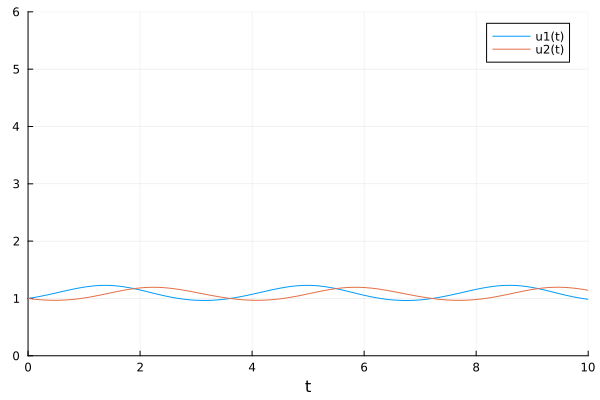

0.7916326592962362

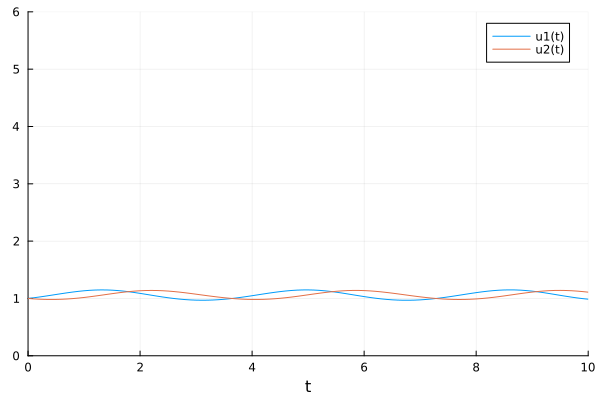

0.03742463165473026

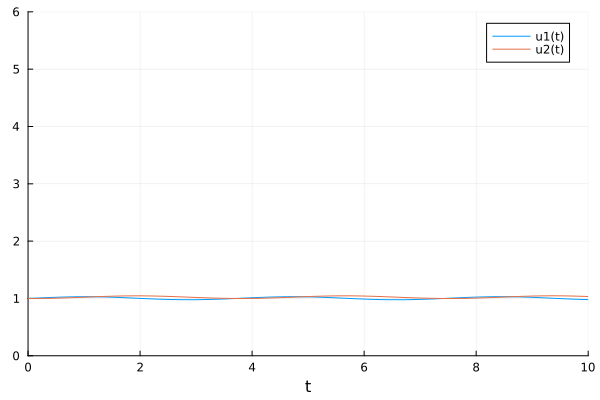

0.29768426502036754

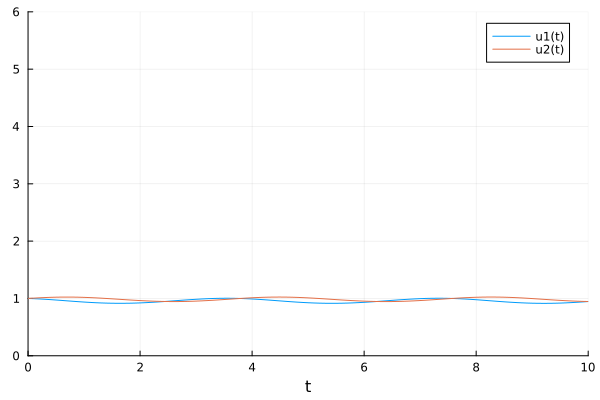

0.828056188325545

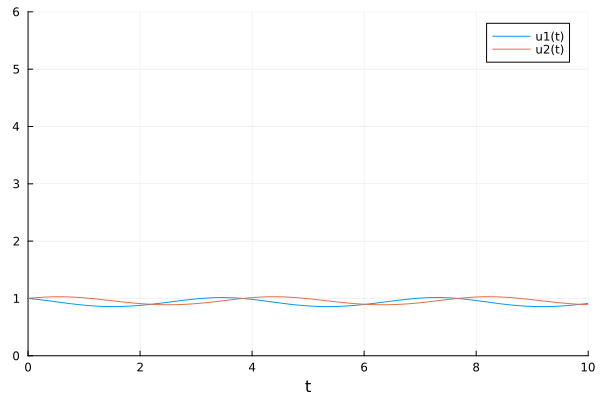

0.901416216079711

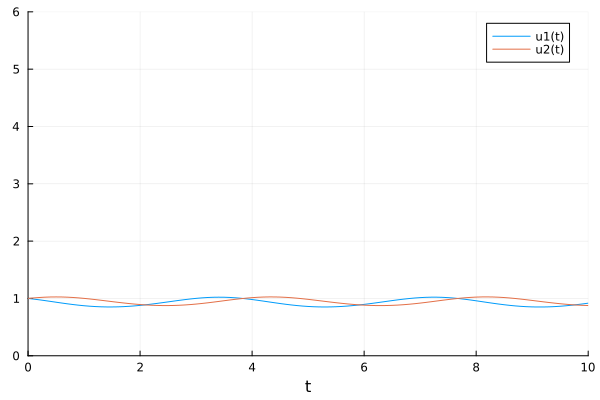

0.5155767309833628

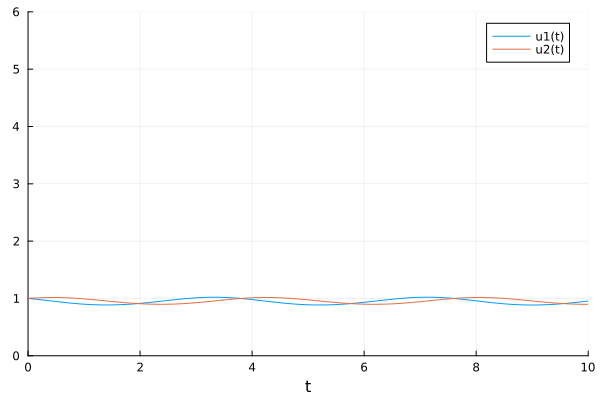

0.09840650904051823

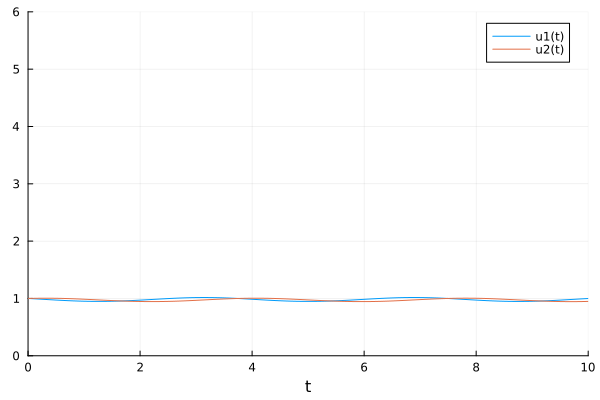

0.039145296280329325

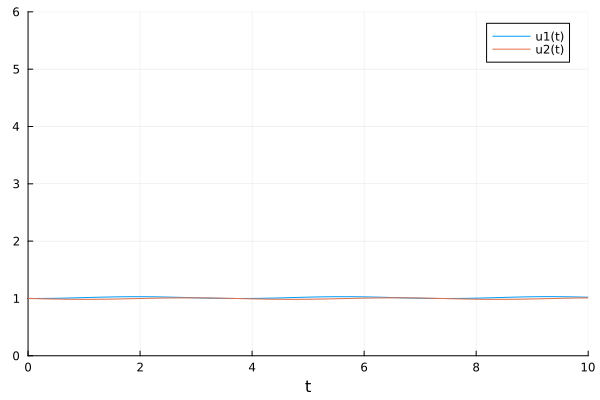

0.3058110996080654

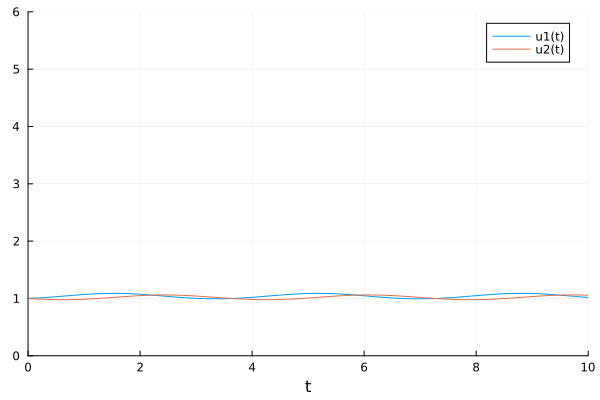

0.4994434220863148

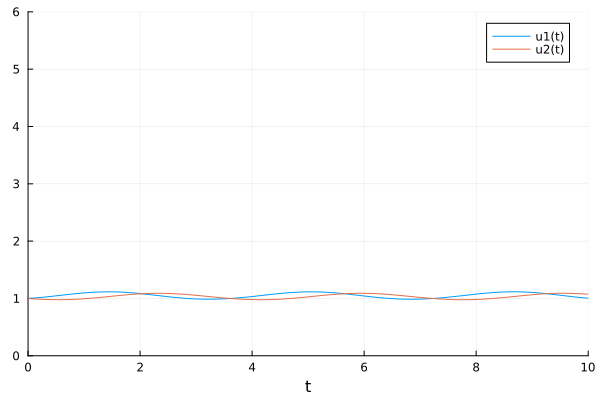

0.38685708309964534

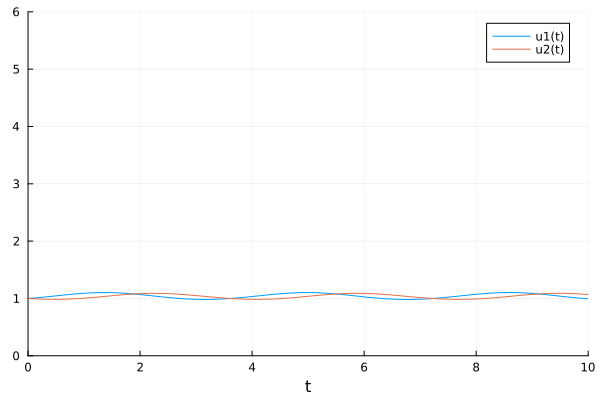

0.13484108838605258

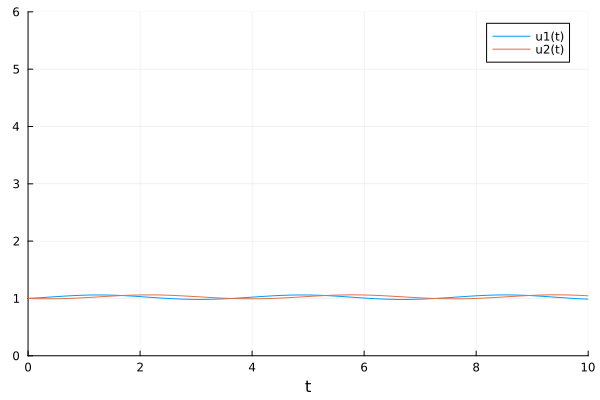

0.012609947348896118

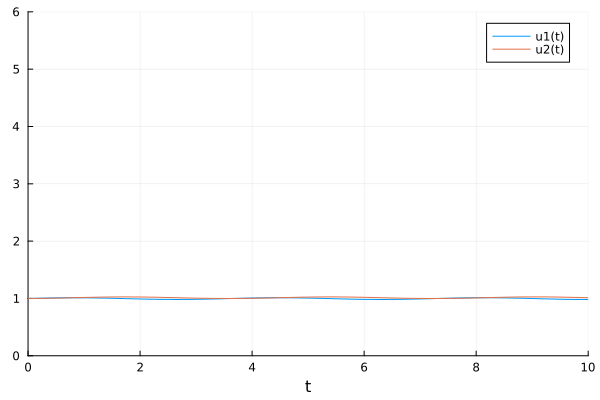

0.09175875216680629

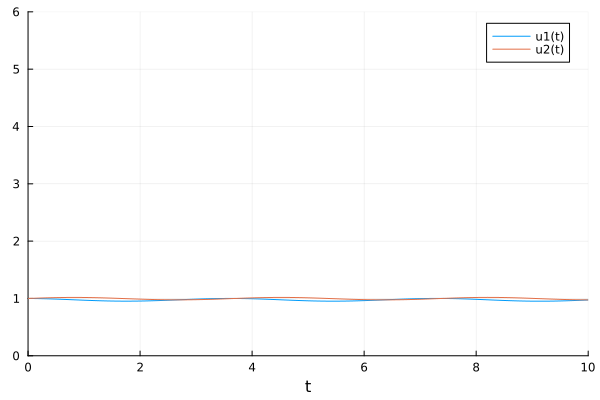

0.23131377916374046

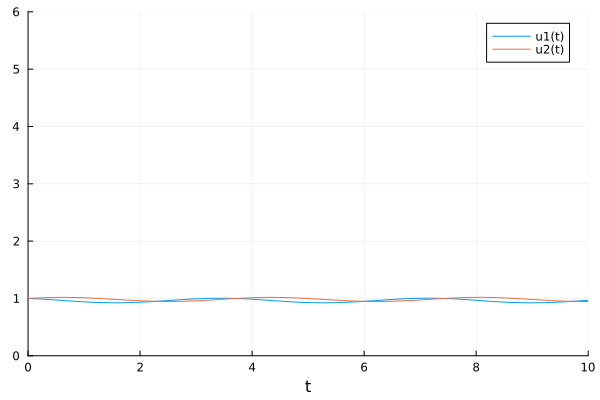

0.2693682956957333

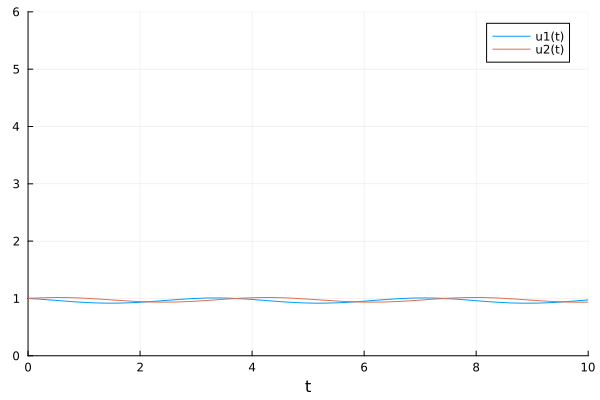

0.17522504934651886

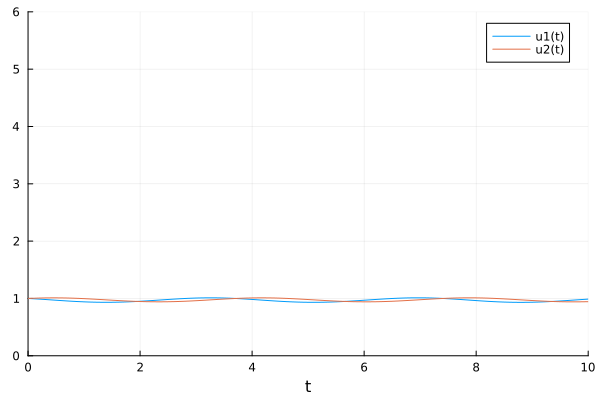

0.04894701517163931

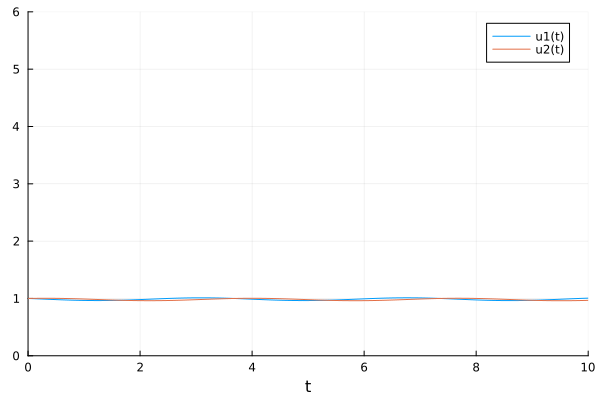

0.008903769914114432

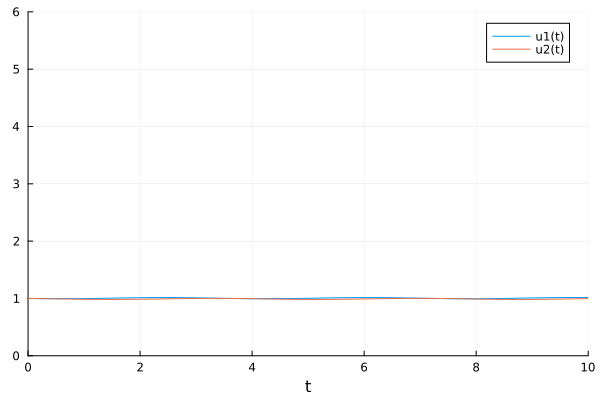

0.07254064968248382

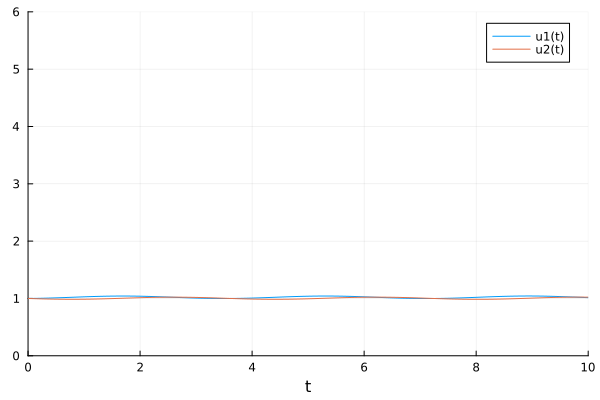

0.14476165255750686

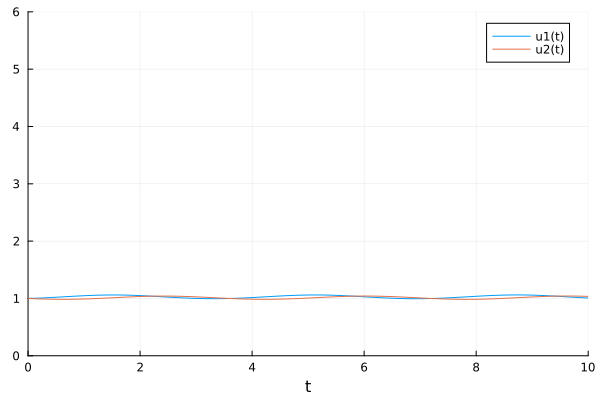

0.1367110912699567

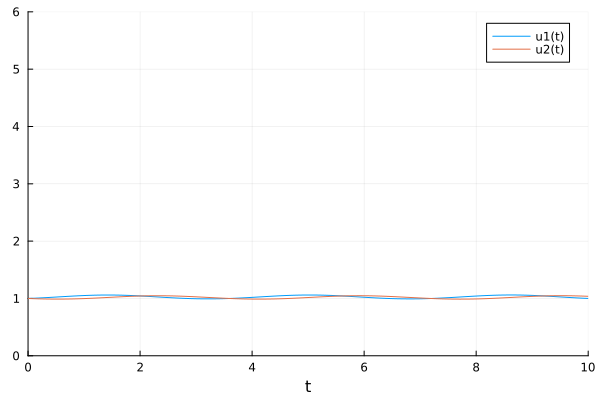

0.064044430183169

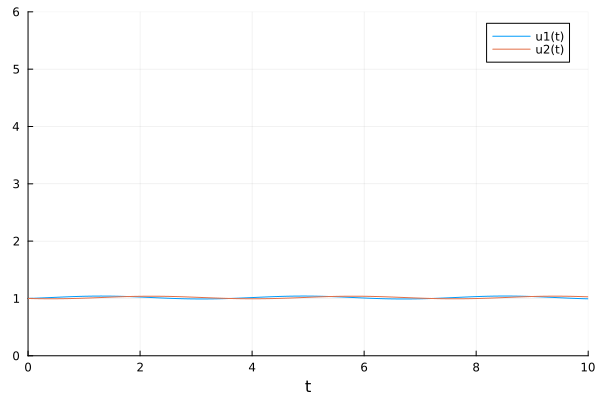

0.009232450738568354

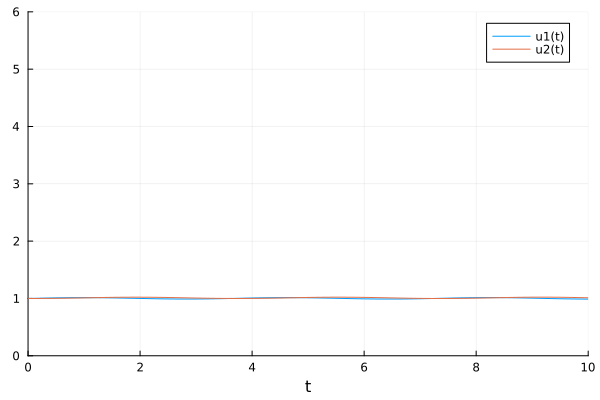

0.019709415678223822

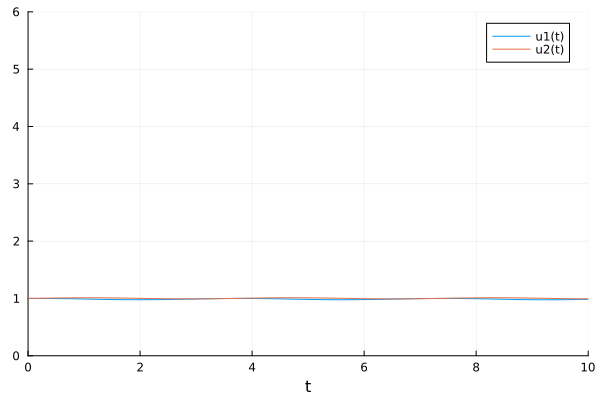

0.06553863352421466

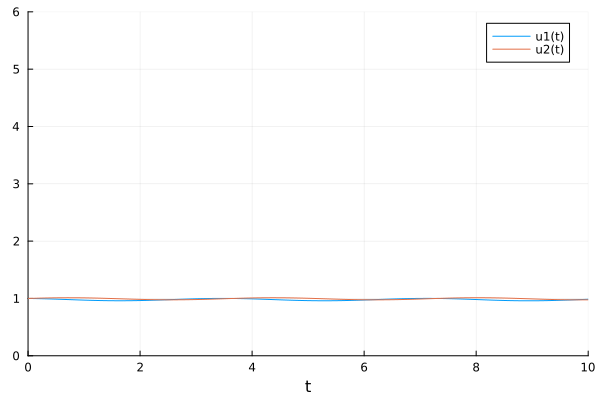

0.0870717448891946

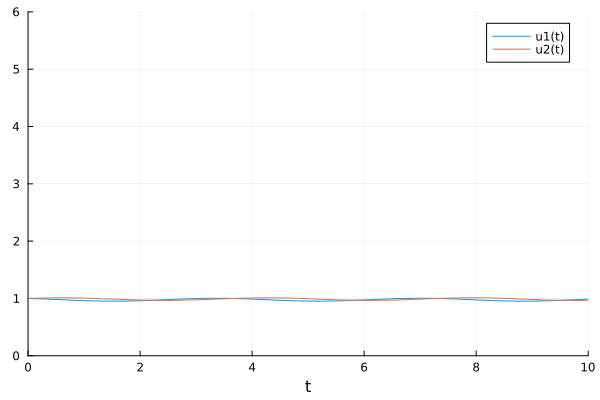

0.06127953556541898

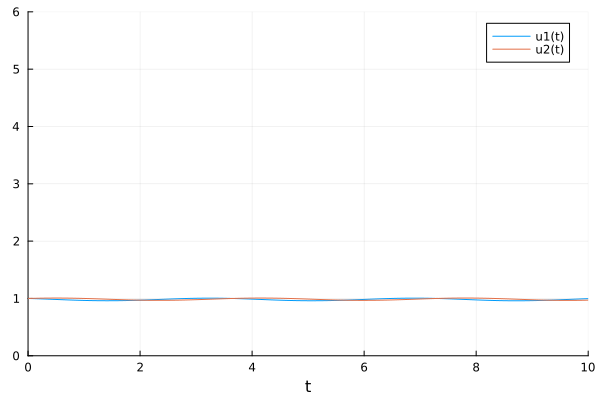

0.01865196648740868

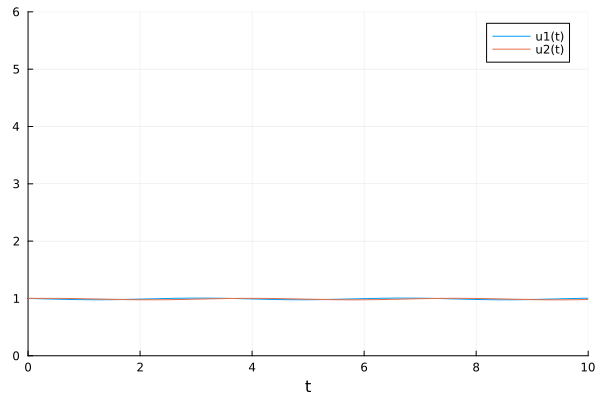

0.003574469463539602

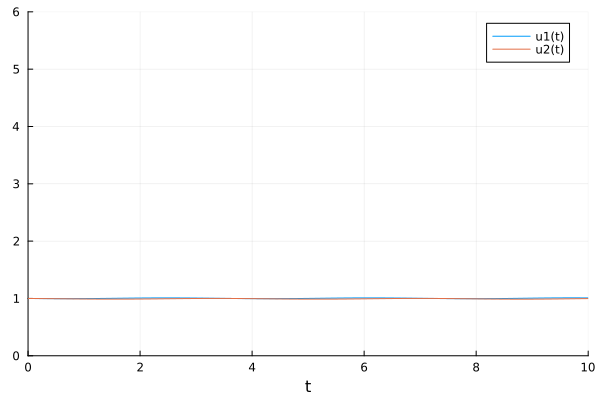

0.024719501208784894

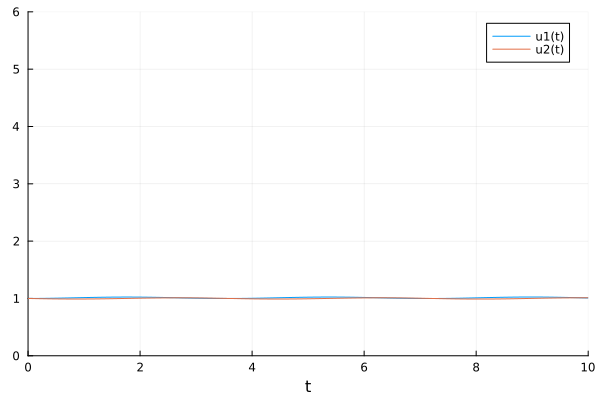

0.048496982885232194

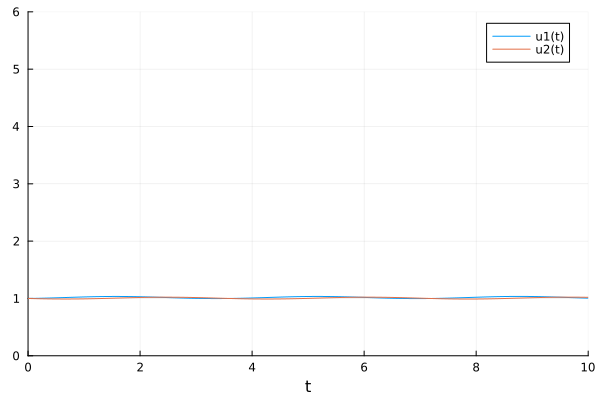

0.0438196722181701

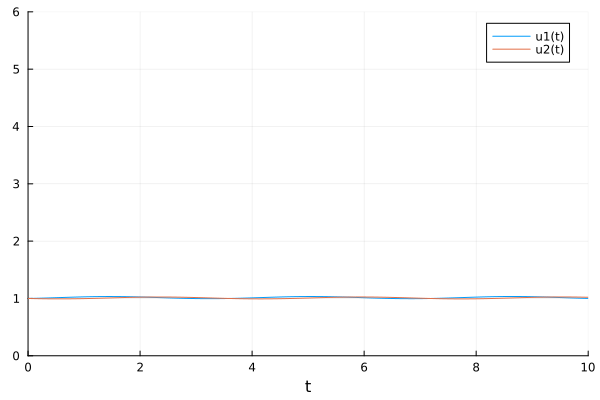

0.018228578245086533

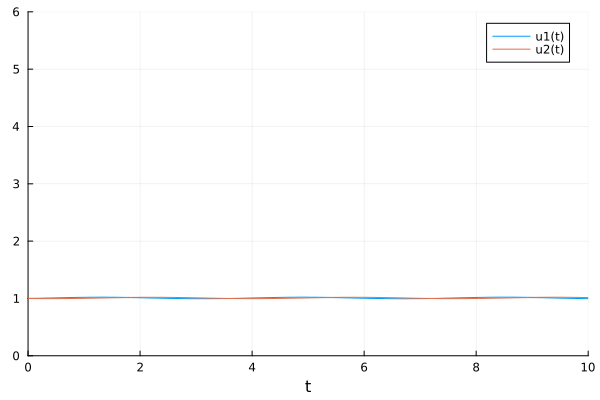

0.002303097828620115

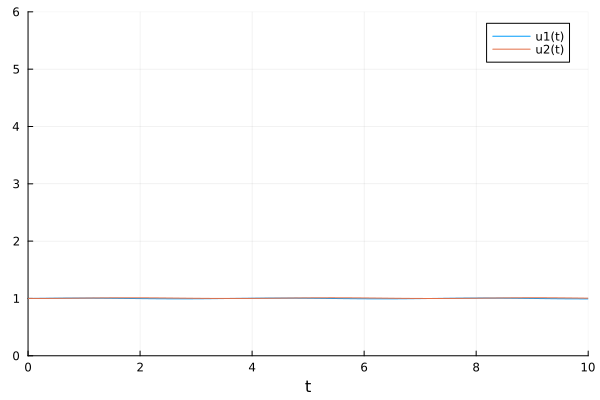

0.01024177054099831

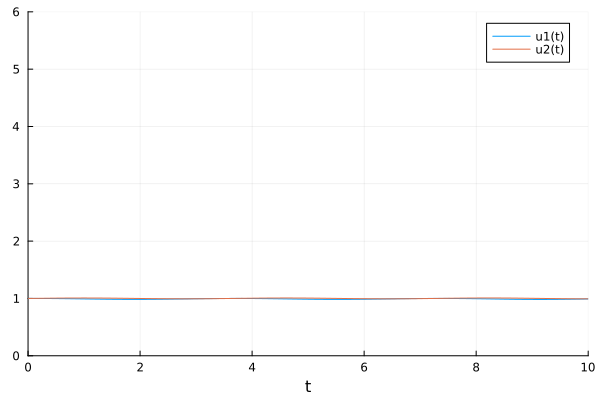

0.026168157689383152

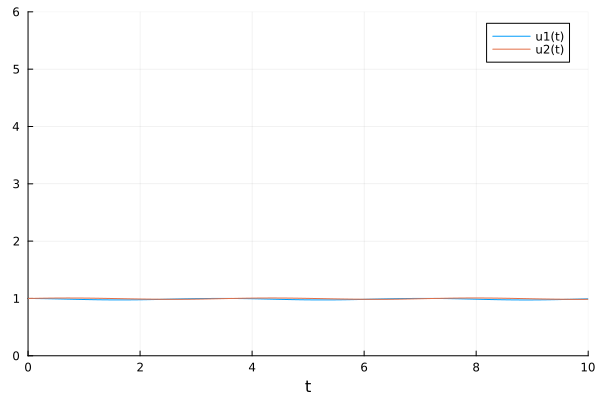

0.028437569164599018

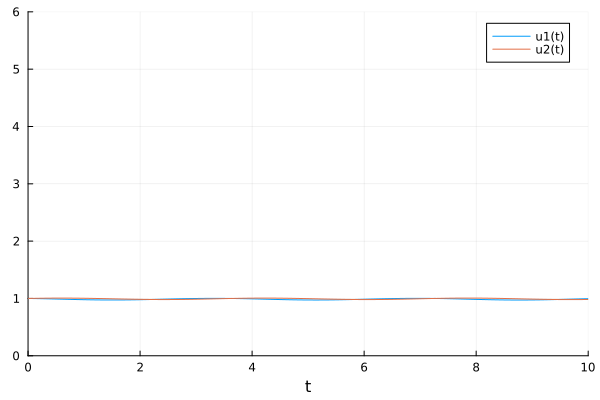

0.014885267309093847

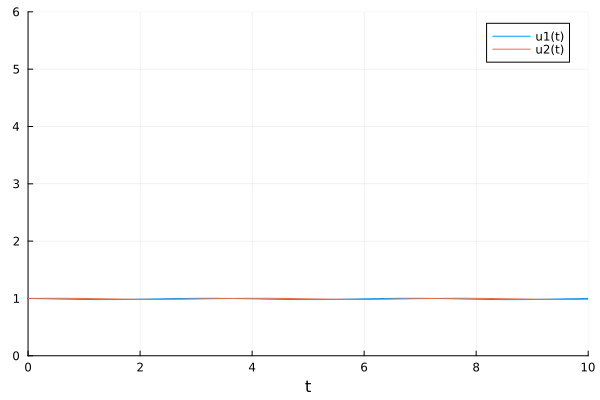

0.002331152112027745

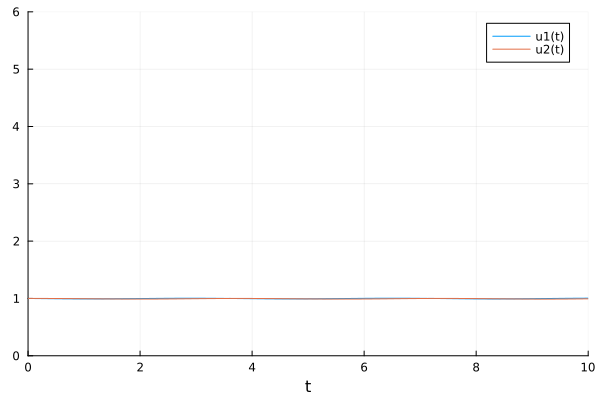

0.004153146614936565

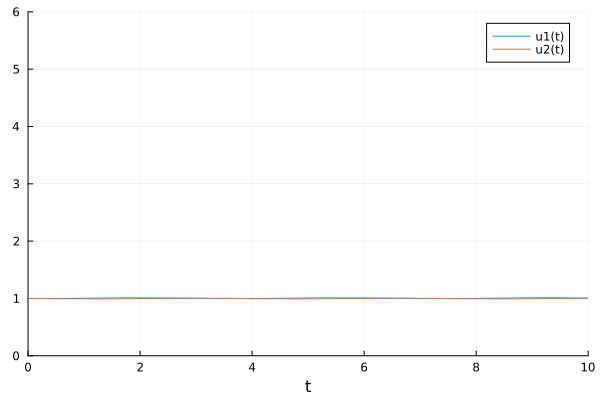

0.014354675236617664

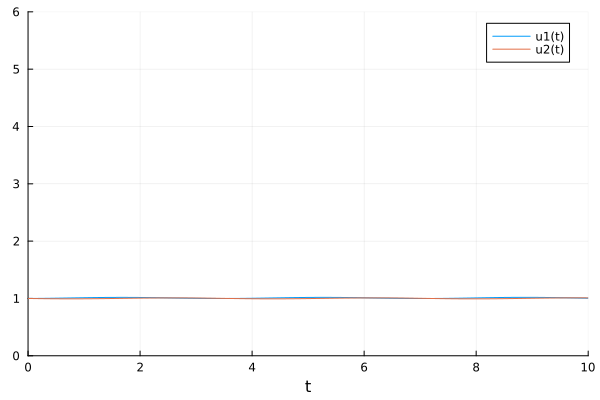

0.017515341178307792

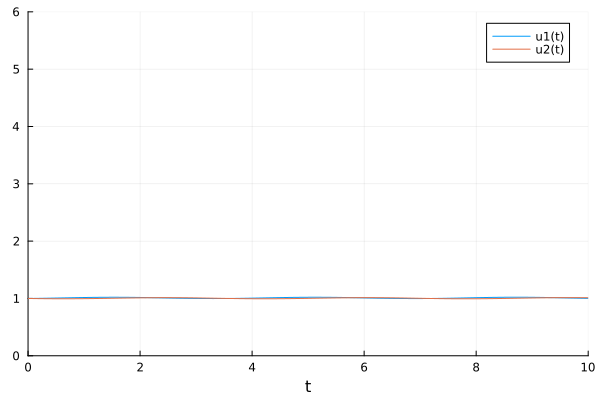

0.009765158348086816

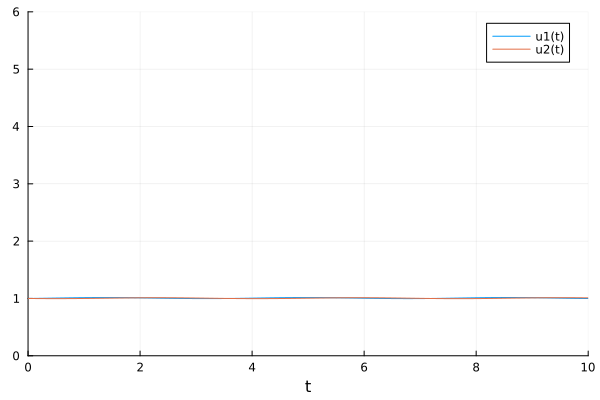

0.0016183558454676437

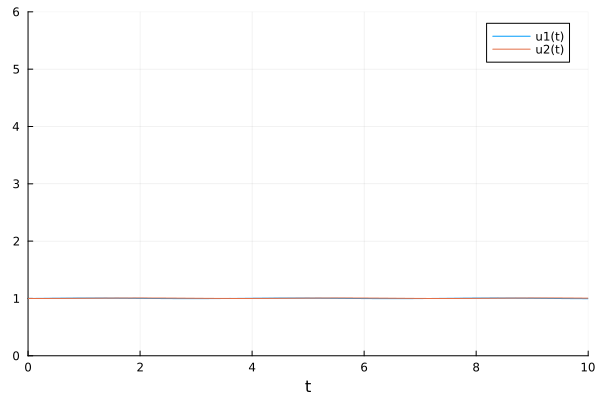

0.002437853878728801

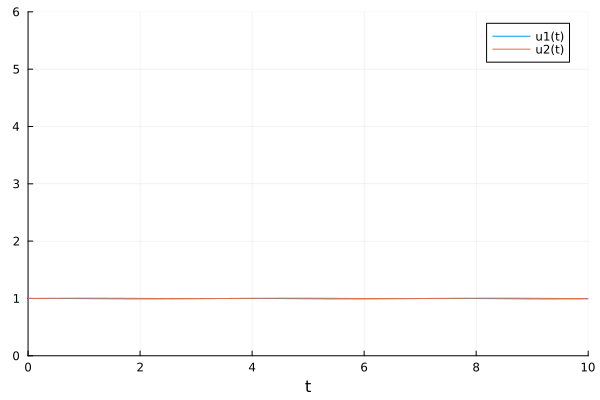

0.008682694139489818

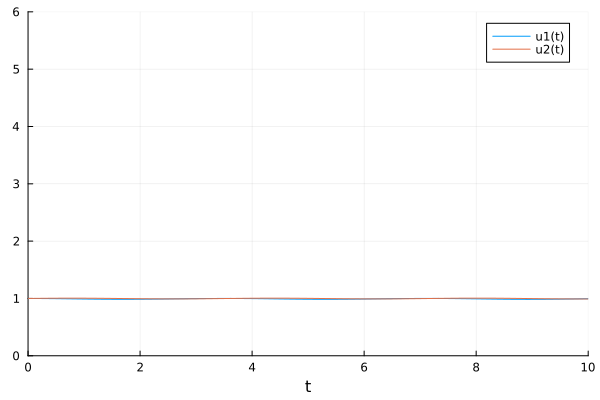

0.010688314001335856

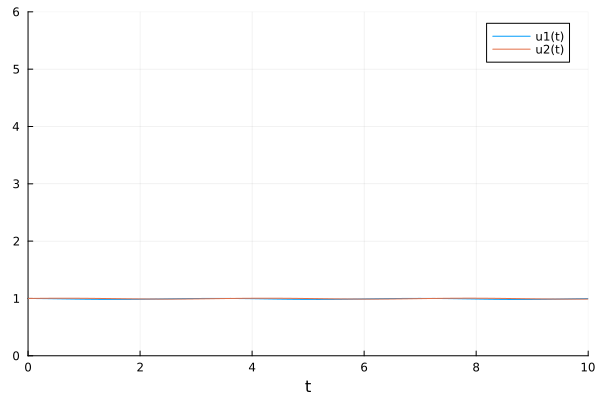

0.005896313991894809

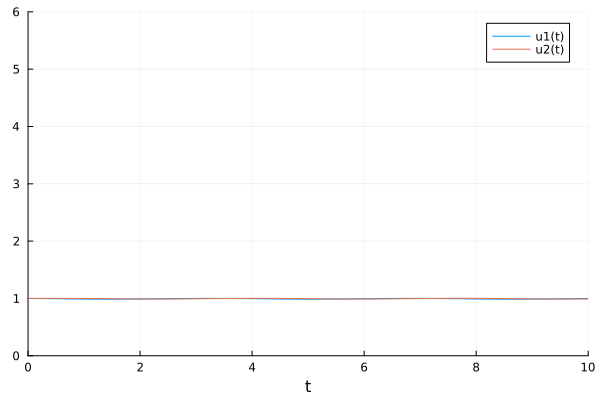

0.0009122060185649694

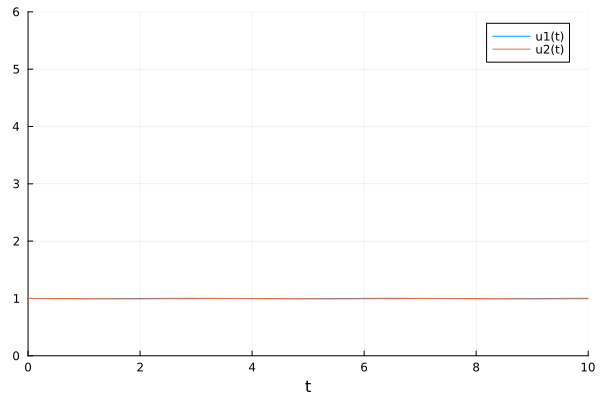

0.0016599230522033799

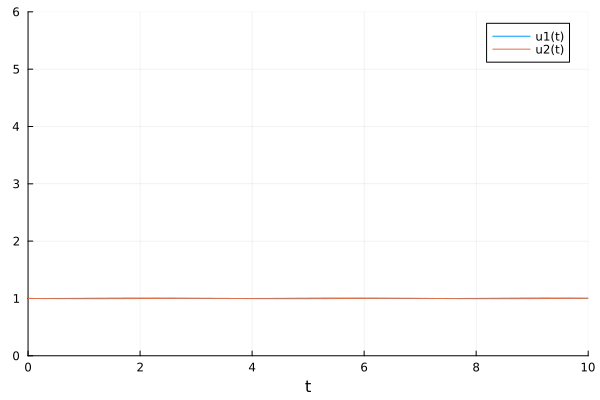

0.0056192006889377

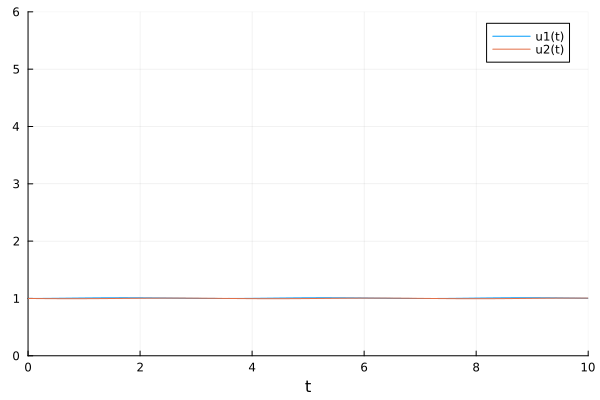

0.006412366966631584

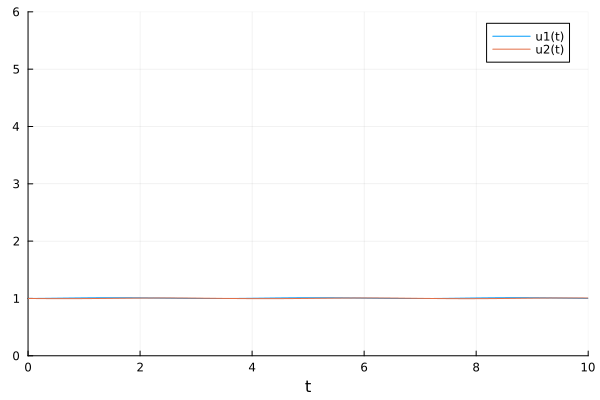

0.0030663055217739557

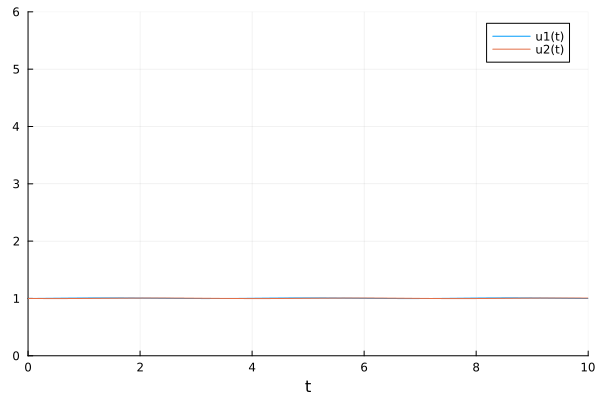

0.00036201110550087597

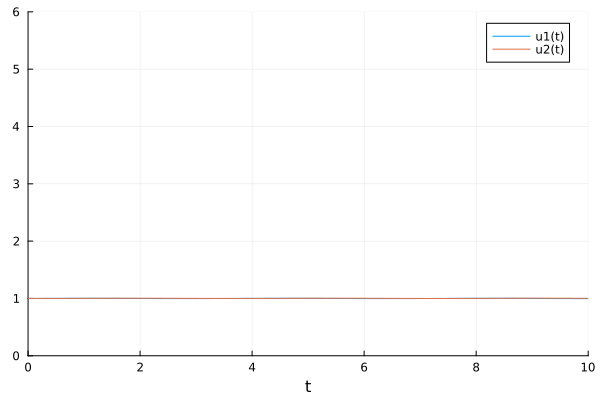

0.0015200917799396087

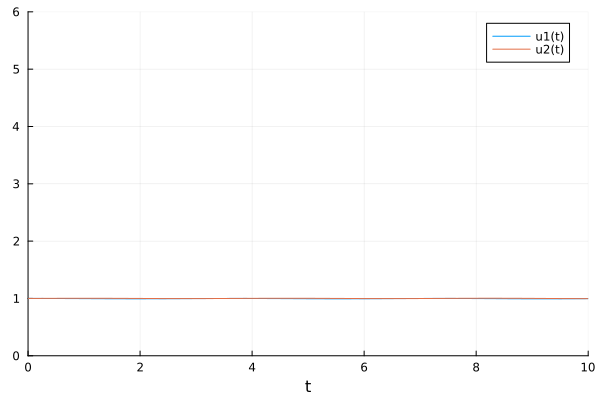

0.0038956496832328845

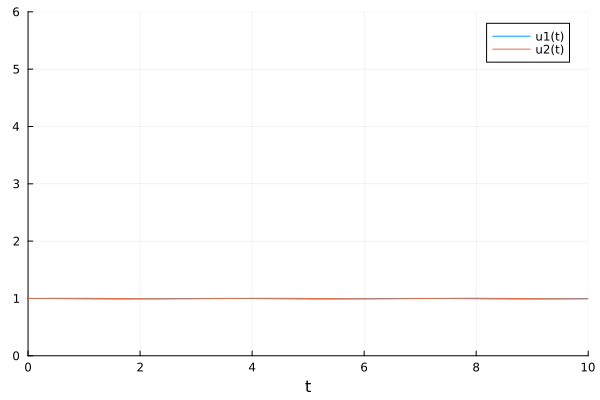

0.0037081450294369728

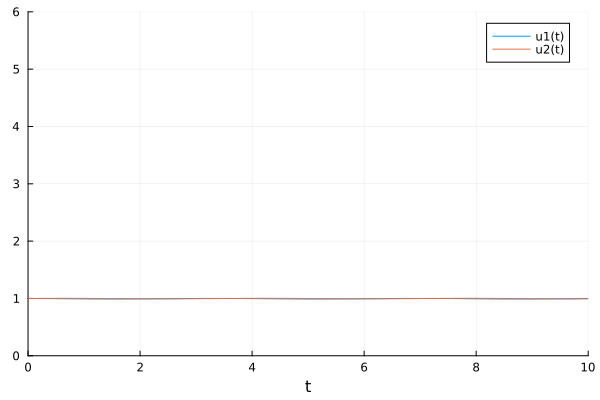

0.0013508402428971911

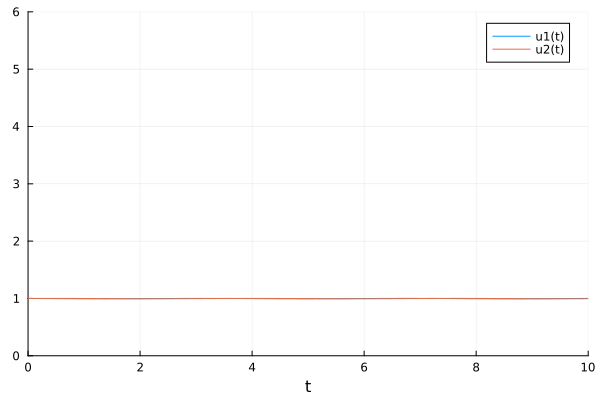

0.00018819854301899461

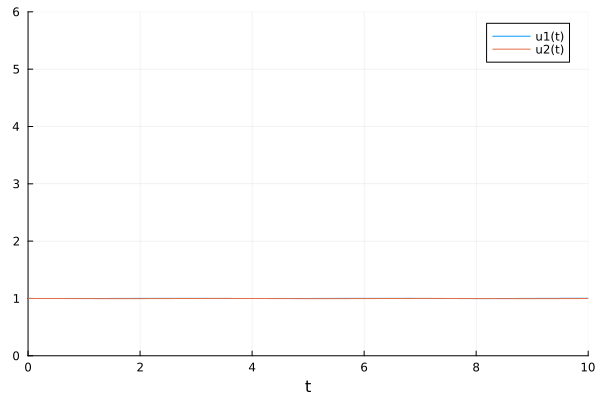

0.0014389419518238329

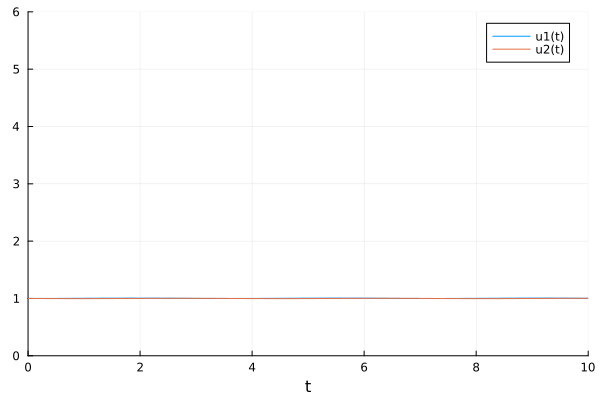

0.0026745466483459714

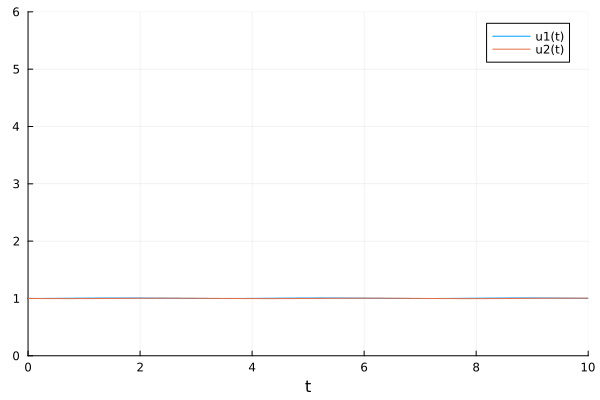

0.0019066022212870682

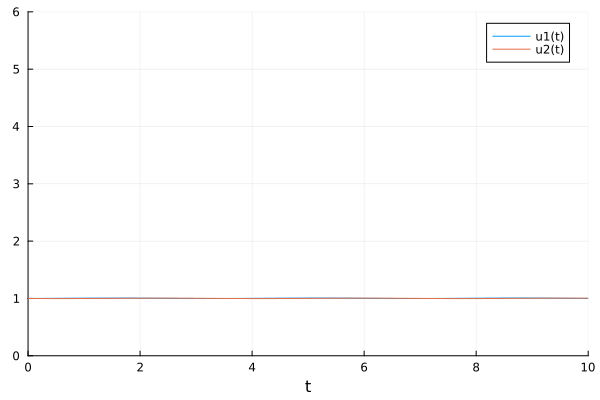

0.0004155479275583152

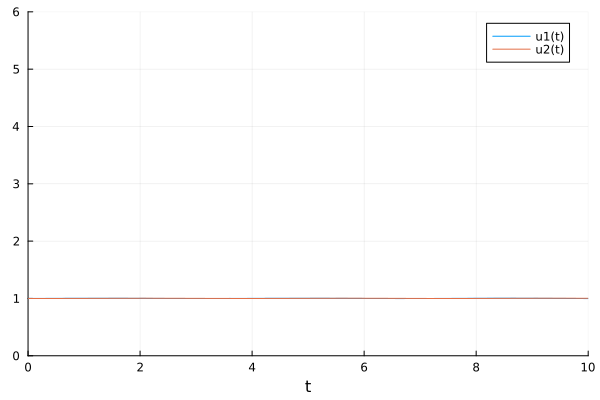

0.00031440573706154686

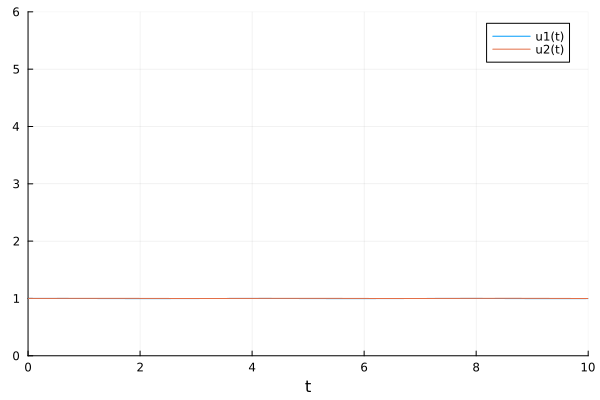

0.0013662124454391627

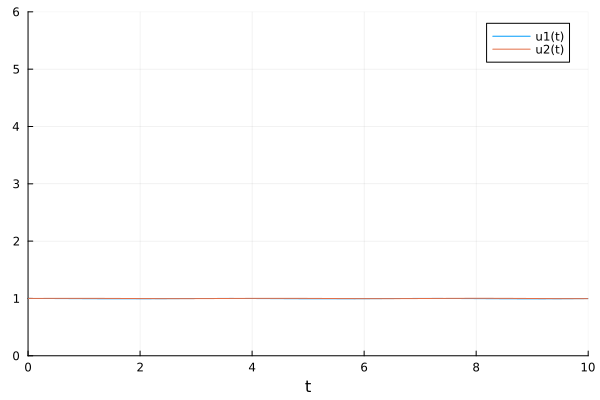

0.0016719548093512586

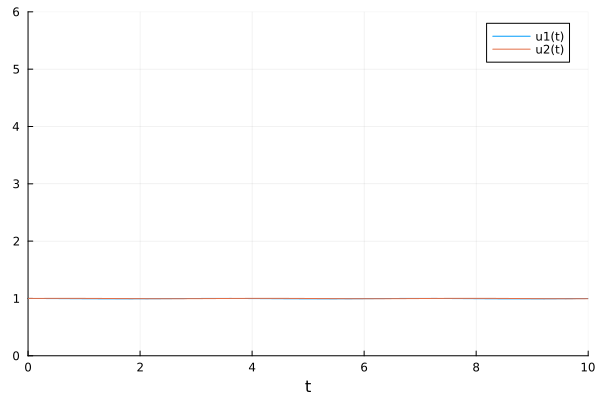

0.0007880369411062435

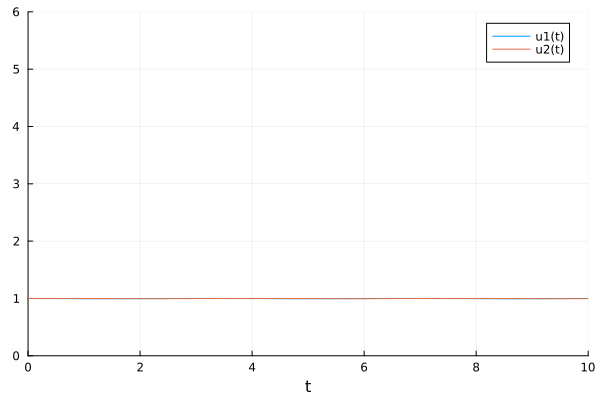

9.574630755983696e-5

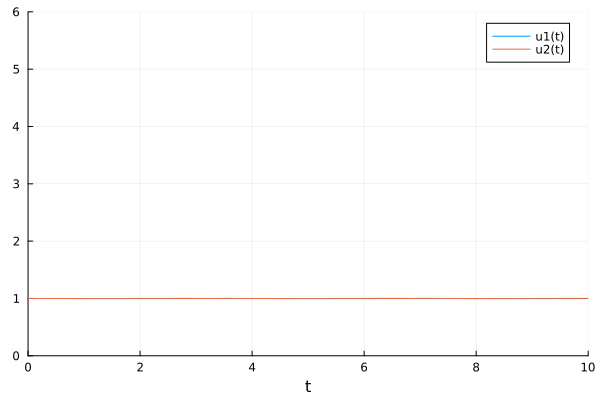

0.0005204236805293223

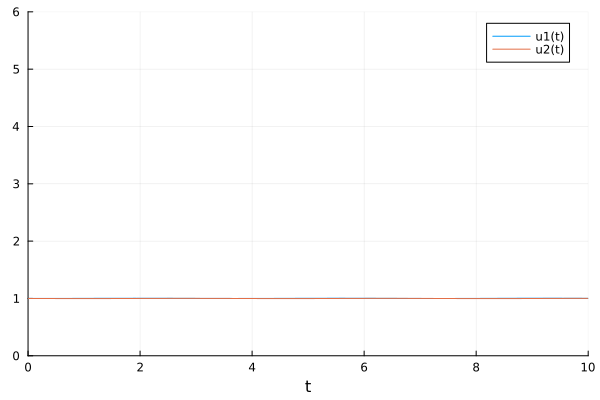

0.001111374417087423

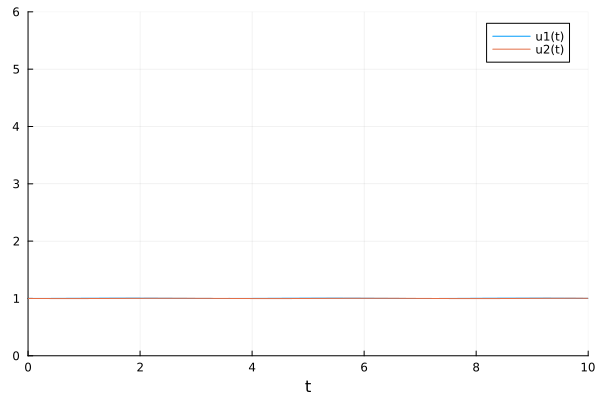

0.0008589507121305658

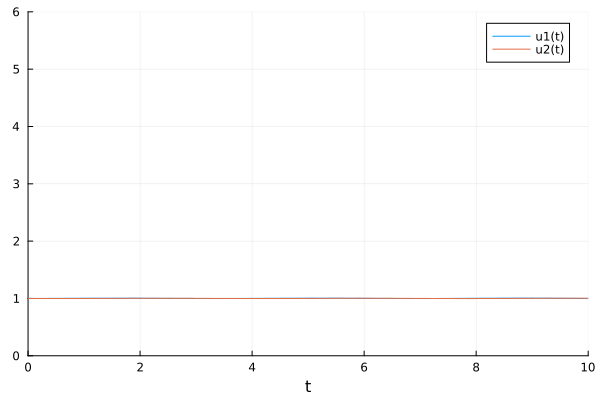

0.00019665692808680873

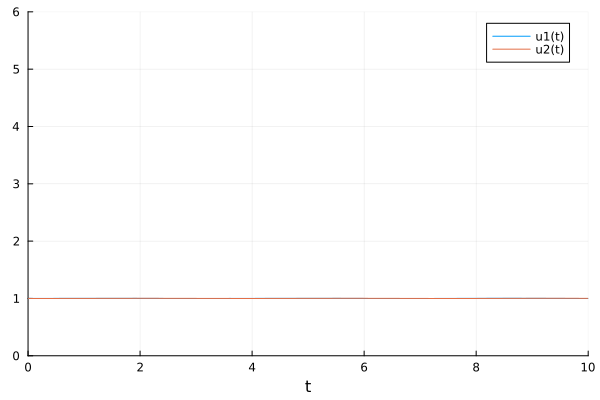

0.00015158855923857472

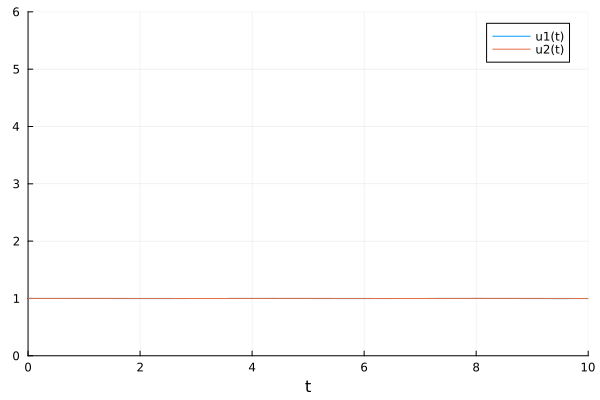

0.0006224057050770041

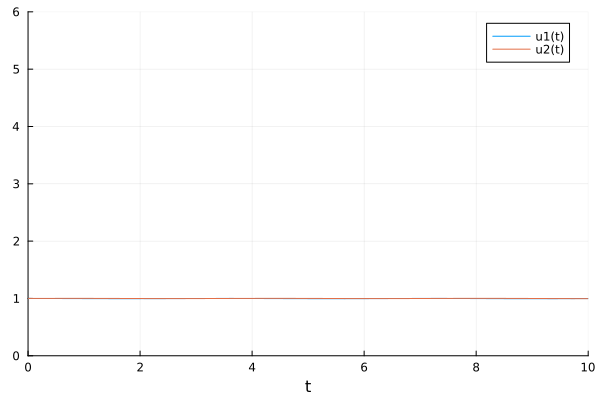

0.0007141207956545325

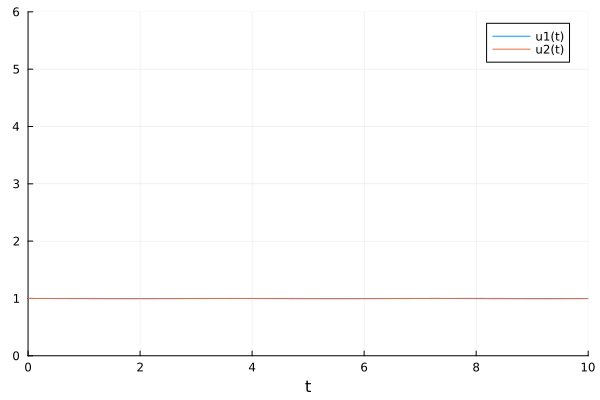

0.00029491983109237584

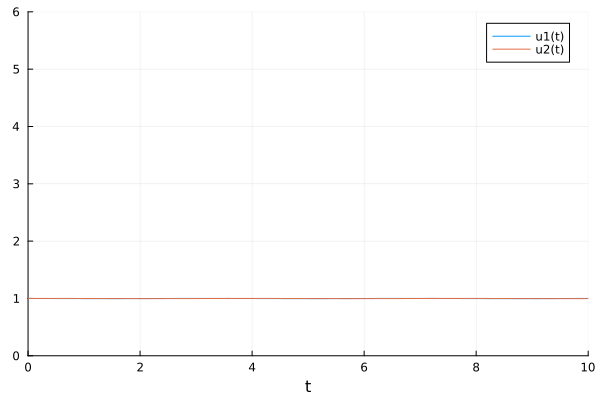

5.491635971062643e-5

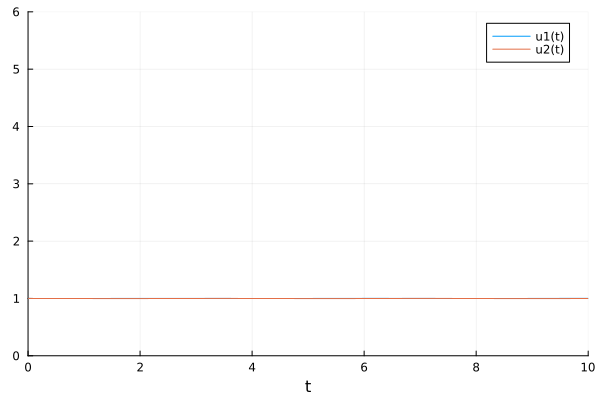

0.00030943530408844317

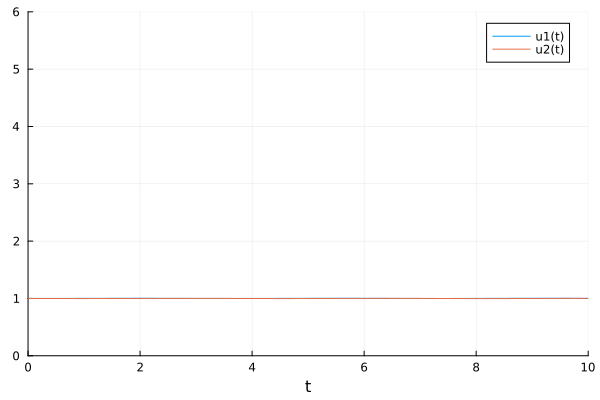

0.0005219574340614414

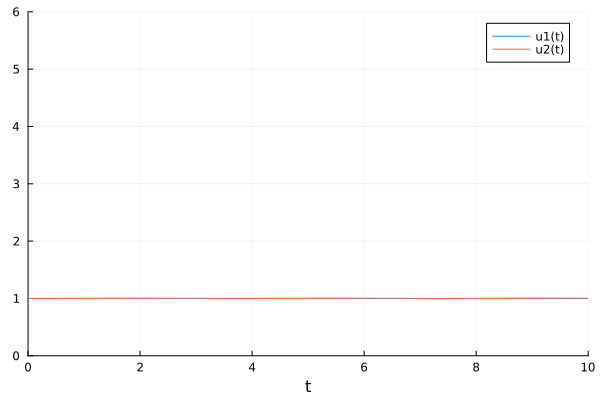

0.00031082904892098146

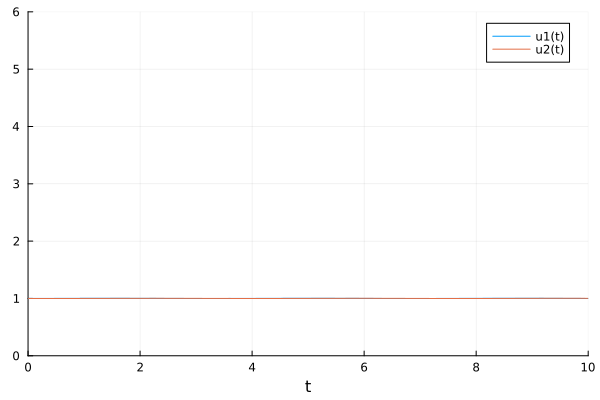

5.993383394669172e-5

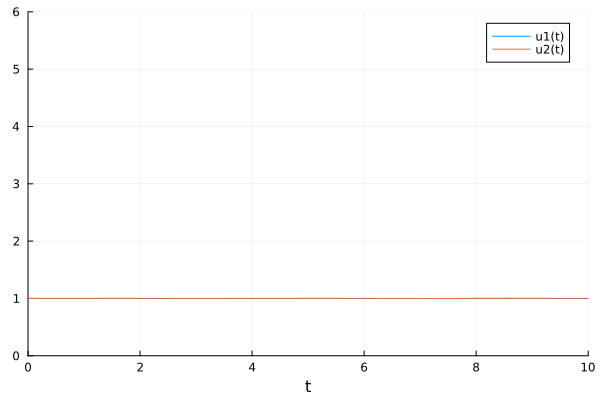

0.00015257744636062832

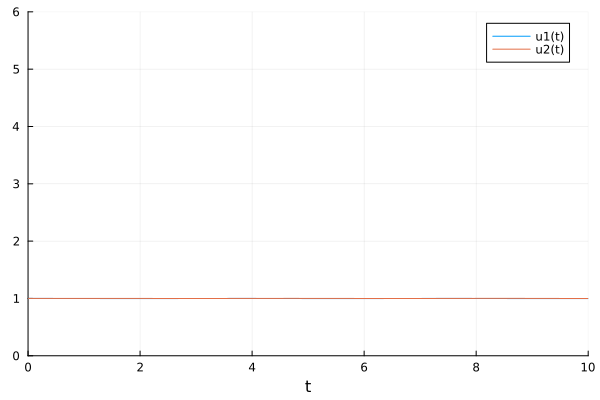

0.0003487553495929186

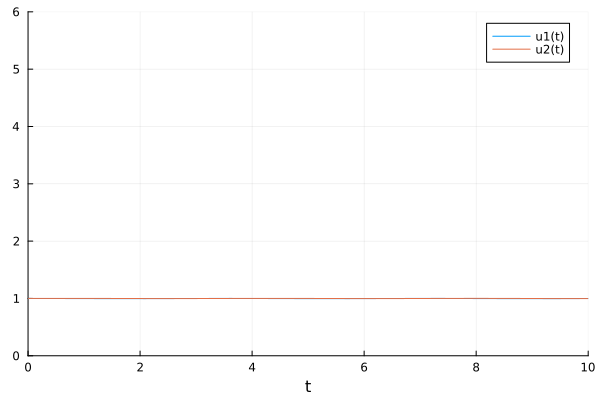

0.0002791380075936932

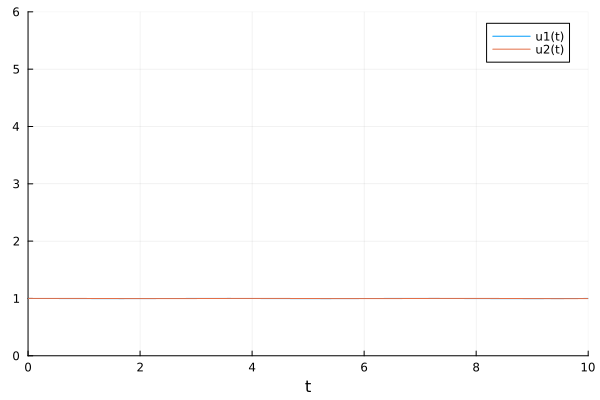

7.740719962366792e-5

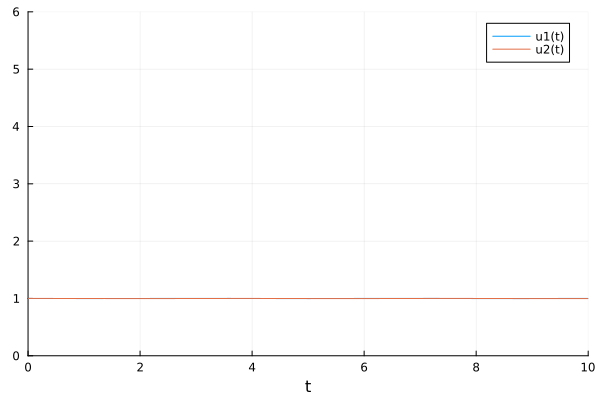

7.846160809046503e-5

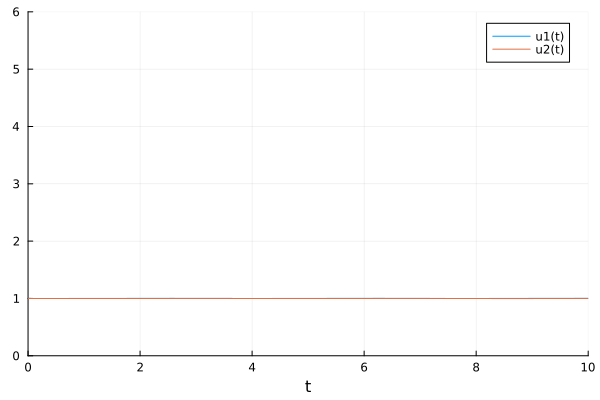

0.00023000597844361647

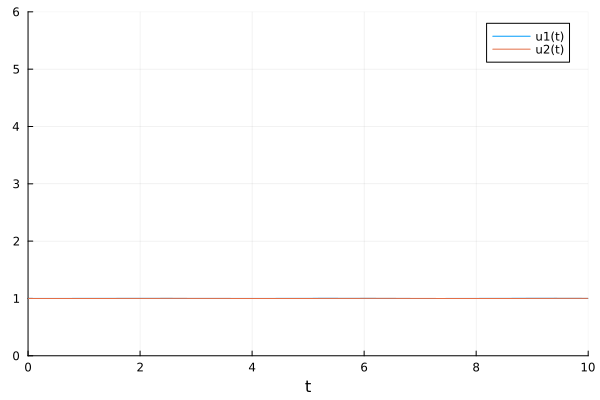

0.00022601128389294732

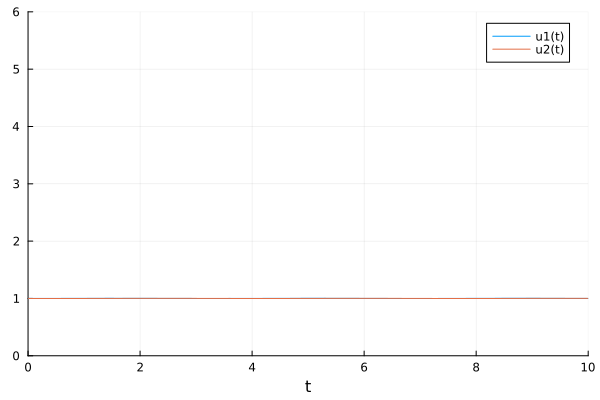

8.411690480086684e-5

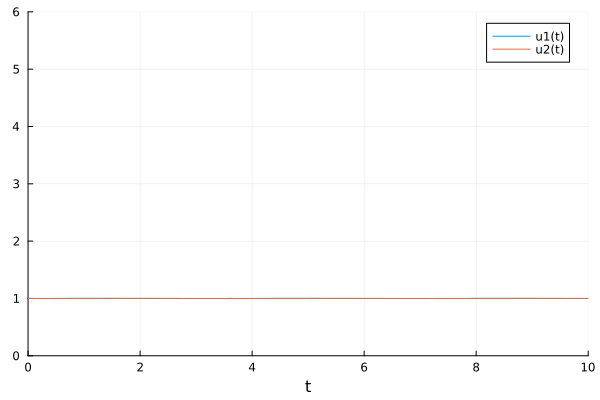

4.949062963858241e-5

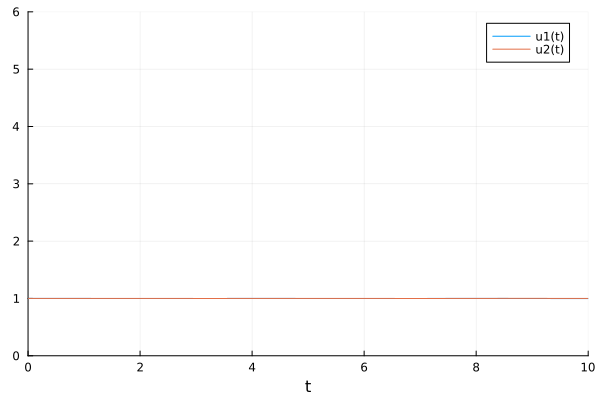

0.00015782899908725351

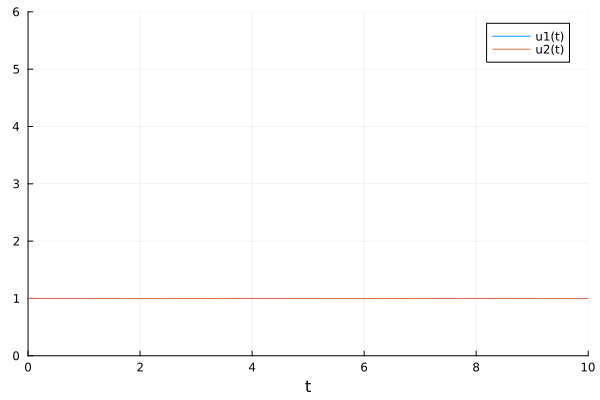

0.00017761311737069907

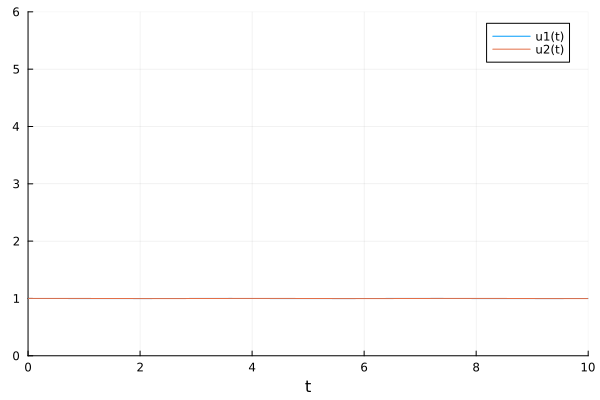

7.975779815081526e-5

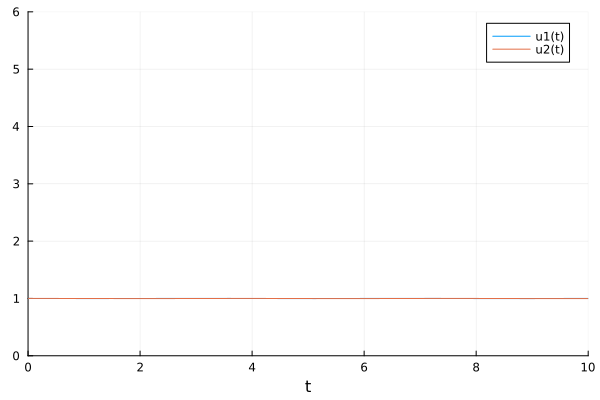

3.939447044061603e-5

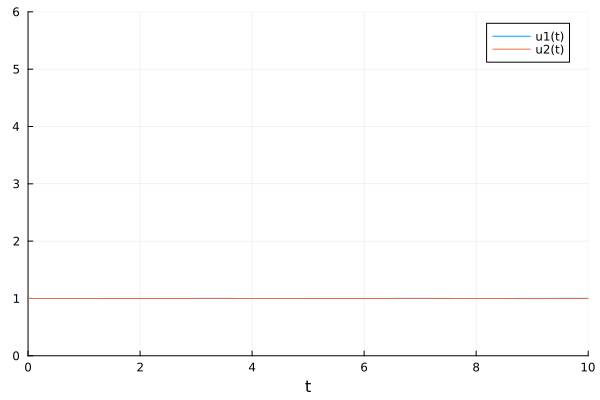

0.00011433429019672233

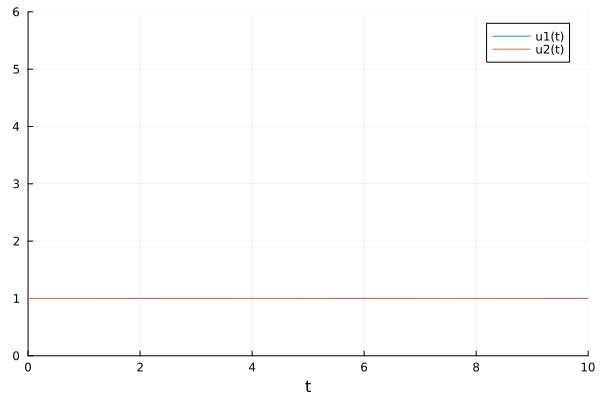

In [31]:
#running 100 epochs to minimize our loss function (loss_rd()) and thus obtain the optimized parameters:
data = Iterators.repeated((), 100)
opt = ADAM(0.1)
cb = function () #callback function to observe training
  display(loss_rd())
  # using `remake` to re-create our `prob` with current parameters `p`
  display(plot(solve(remake(prob,p=p),Tsit5(),saveat=0.1),ylim=(0,6)))
end




In [47]:
# Display the ODE with the initial parameter values.
#cb()

#Flux.train!(loss_rd, params, data, opt, cb = cb)

#println("Learned parameters:", p)

In [41]:
# neural ode example:
u0 = Float32[2.; 0.]
datasize = 30
tspan = (0.0f0,1.5f0)

function trueODEfunc(du,u,p,t)
    true_A = [-0.1 2.0; -2.0 -0.1]
    du .= ((u.^3)'true_A)'
end
t = range(tspan[1],tspan[2],length=datasize)
prob = ODEProblem(trueODEfunc,u0,tspan)
ode_data = Array(solve(prob,Tsit5(),saveat=t))

2×30 Matrix{Float32}:
 2.0  1.9465    1.74178  1.23837  0.577125  …  1.40688   1.37022   1.29214
 0.0  0.798831  1.46473  1.80877  1.86465      0.451368  0.728686  0.972085

In [42]:
dudt = Chain(x -> x.^3,
             Dense(2,50,tanh),
             Dense(50,2))
n_ode = NeuralODE(dudt,tspan,Tsit5(),saveat=t,reltol=1e-7,abstol=1e-9)
ps = Flux.params(n_ode)

Params([Float32[0.023230001, -0.004334371, -0.22558795, 0.060406893, -0.2944393, -0.08429791, 0.18289918, -0.15596674, 0.14963439, 0.10773597  …  0.19724914, 0.25834876, -0.12950347, 0.17850706, -0.082664, -0.2826407, 0.2714386, 0.18756402, 0.0, 0.0]])

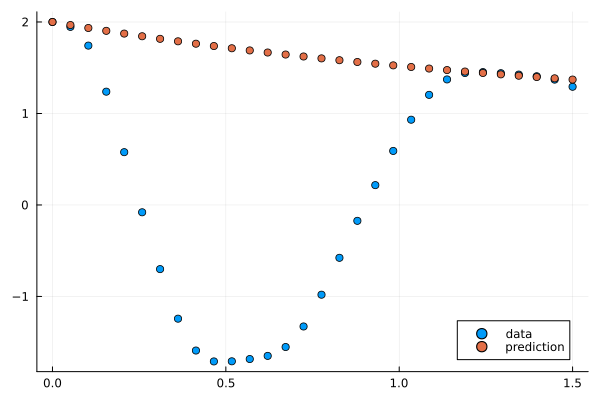

In [35]:
pred = n_ode(u0) # Get the prediction using the correct initial condition




In [45]:
##training neural network with predict function and loss funciton
function predict_n_ode()
  n_ode(u0)
end
loss_n_ode() = sum(abs2,ode_data .- predict_n_ode())

loss_n_ode (generic function with 1 method)

Learned parameters:[1.9757755167638256, 1.9770371918956762, 1.5464543054429418, 1.5462039138522123]


0.06558681f0

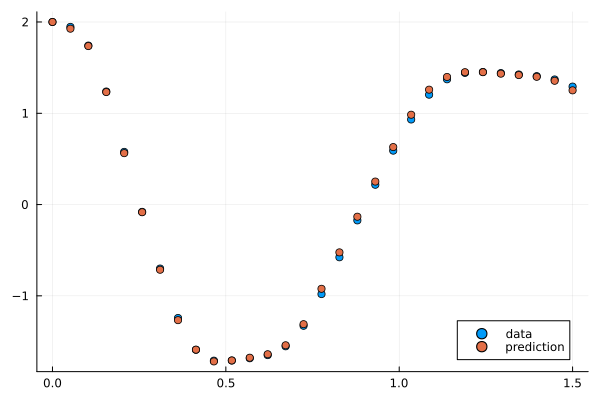

In [49]:
data = Iterators.repeated((), 1000)
opt = ADAM(0.1)
cb = function () #callback function to observe training
  display(loss_n_ode())
  # plot current prediction against data
  cur_pred = predict_n_ode()
  pl = scatter(t,ode_data[1,:],label="data")
  scatter!(pl,t,cur_pred[1,:],label="prediction")
  display(plot(pl))
end

println("Learned parameters:", p)

# Display the ODE with the initial parameter values.
cb()

#Flux.train!(loss_n_ode, ps, data, opt, cb = cb)
